In [1]:
import numpy as np

In [23]:
import numpy as np
import cv2
import plotly.graph_objects as go
from scipy.spatial.transform import Rotation as R

# ----------------------------
# 1. Wczytanie danych
# ----------------------------
lidar = np.load("/home/developer/ros2_ws/src/UNET_trening/lidar_data.npy")  # (6400, 3)
mask  = np.load("/home/developer/ros2_ws/src/UNET_trening/mask.npy")         # (256, 256, 3)

# ----------------------------
# 2. Parametry LiDAR
# ----------------------------
horizontal_samples = 400
vertical_samples   = 16

# ----------------------------
# 3. Transformacja LiDAR do układu kamery
# ----------------------------
# ustaw przesunięcie LiDAR względem kamery (w metrach)
dx, dy, dz = 0.0, 0.0, 0.2  # np. LiDAR 20 cm nad kamerą

# ustaw obrót LiDAR względem kamery (roll, pitch, yaw) w radianach
roll, pitch, yaw = 0.0, 0.0, 0.0  # jeśli brak obrotu

# macierz rotacji
rot = R.from_euler('xyz', [roll, pitch, yaw]).as_matrix()

# transformacja punktów
lidar_cam = (rot @ lidar.T).T + np.array([dx, dy, dz])
x, y, z = lidar_cam[:,0], lidar_cam[:,1], lidar_cam[:,2]

# ----------------------------
# 4. Skalowanie maski do rozdzielczości LiDAR
# ----------------------------
# maska oryginalna 256x256 -> 16x400
mask_resized = cv2.resize(mask, (horizontal_samples, vertical_samples), interpolation=cv2.INTER_NEAREST)

# odwrócenie osi pionowej, żeby dolne piksele maski trafiały na dolne punkty LiDAR
mask_resized = np.flipud(mask_resized)

# zamiana na 1D (tak jak punkty LiDAR)
colors = mask_resized.reshape(-1, 3) / 255.0  # wartości 0-1 dla Plotly

# ----------------------------
# 5. Tworzenie wykresu 3D w Plotly
# ----------------------------
fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=2,
        opacity=0.8,
        color=['rgb({},{},{})'.format(int(r*255), int(g*255), int(b*255)) for r,g,b in colors]
    )
)])

# Ustawienia osi
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    title="Chmura punktów LiDAR pokolorowana maską"
)

fig.show()


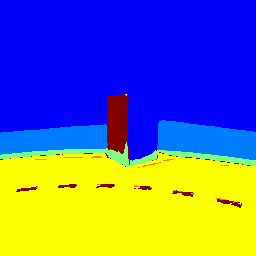

In [19]:
import PIL

PIL.Image.fromarray(mask)

In [20]:
mask.shape

(256, 256, 3)